<div class="alert alert-info">
    <h1>Analysis of Saturn's F Ring During the Cassini Mission</h1>
    <h1>Look for Patterns in Voyager Photometry</h1>
    
Robert S. French, rfrench@seti.org - Last updated April 11, 2024

Research performed under NASA Grant 80NSSC21K0527 for CDAP proposal "The Recent History of Saturn's Dusty Rings".

<h2>The Problem</h2>
Voyager images are low-resolution and sometimes poorly navigated. This could cause problems with background subtraction. If the background contains some of the actual signal, then we would expect the EW to be lower since more background is being subtracted.

<h2>Methodology</h2>
Look at the correlation between resolution and EW to see if there are any patterns.
</div>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mplcursors
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..')
from f_ring_util.f_ring import (compute_corrected_ew, 
                                fit_hg_phase_function, 
                                hg_func,
                                print_hg_params,
                                scale_hg_phase_function)

%matplotlib widget
mpl.rcParams['figure.max_open_warning'] = 100

In [2]:
def read_voyager_ew_stats(filename):
    obsdata = pd.read_csv(filename, parse_dates=['Date'])
    print(f'** SUMMARY STATISTICS - {filename} **')
    print('Unique observation names:', len(obsdata.groupby('Observation')))
    print('Total slices:', len(obsdata))
    print('Starting date:', obsdata['Date'].min())
    print('Ending date:', obsdata['Date'].max())
    print('Time span:', obsdata['Date'].max()-obsdata['Date'].min())
    obsdata['Mu'] = np.abs(np.cos(np.radians(obsdata['Mean Emission'])))
    obsdata['Mu0'] = np.abs(np.cos(np.radians(obsdata['Incidence'])))
    return obsdata

In [3]:
v1_obsdata_0_1 = read_voyager_ew_stats('../data_files/v1_ew_0_1.csv')
print()
v2_obsdata_0_1 = read_voyager_ew_stats('../data_files/v2_ew_0_1.csv')

** SUMMARY STATISTICS - ../data_files/v1_ew_0_1.csv **
Unique observation names: 17
Total slices: 837
Starting date: 1980-11-08 01:13:49
Ending date: 1980-11-17 05:04:13
Time span: 9 days 03:50:24

** SUMMARY STATISTICS - ../data_files/v2_ew_0_1.csv **
Unique observation names: 18
Total slices: 529
Starting date: 1981-08-19 03:36:44
Ending date: 1981-08-29 13:08:28
Time span: 10 days 09:31:44


In [4]:
v1g=v1_obsdata_0_1.groupby('Observation').mean()
v2g=v2_obsdata_0_1.groupby('Observation').mean()

In [5]:
v1g[["Normal EW Mean", "Min Res"]].corr()

,Normal EW Mean,Min Res
Normal EW Mean,1.000000,0.349392
Min Res,0.349392,1.000000


In [6]:
v2g[["Normal EW Mean", "Min Res"]].corr()

,Normal EW Mean,Min Res
Normal EW Mean,1.000000,0.126759
Min Res,0.126759,1.000000


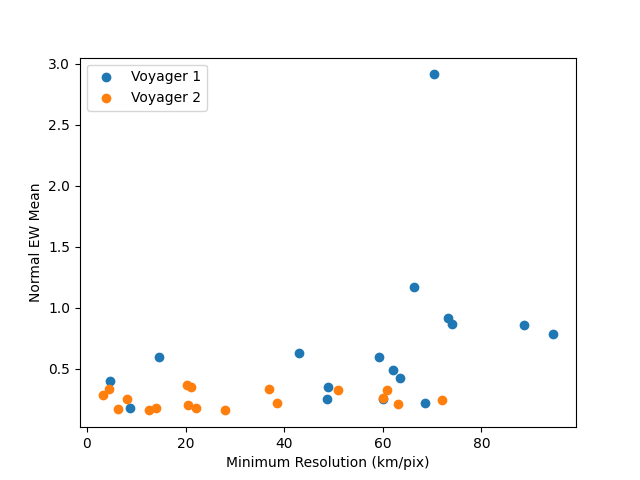

In [7]:
plt.figure()
plt.scatter(v1g['Min Res'], v1g['Normal EW Mean'], label='Voyager 1')
plt.scatter(v2g['Min Res'], v2g['Normal EW Mean'], label='Voyager 2')
plt.legend(loc='upper left')
plt.xlabel('Minimum Resolution (km/pix)')
plt.ylabel('Normal EW Mean')
plt.show()

<div class="alert alert-info">
<h2>Conclusion</h2>

<b>There is no significant correlation between EW and resolution.</b>
</div>